In [26]:
from bigraph_viz import plot_bigraph, replace_regex_recursive

Writing out/nested_composite


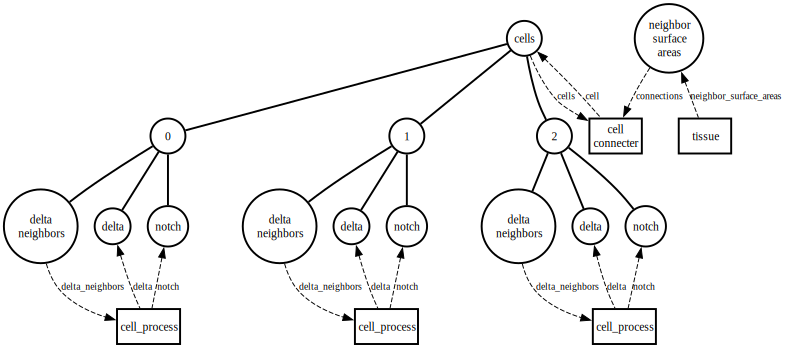

In [31]:
n_cells = 3

nested_composite_spec = {
    'tissue': {
        '_type': 'process',
        'config': {},
        '_inputs': {},
        '_outputs': {
            'neighbor_surface_areas': 'any',
        },
        'inputs': {},
        'outputs': {
            'neighbor_surface_areas': ['neighbor surface areas'],  # this is a map from each cell to ids of its neighbors and their common surface area
        }
    },
    'cells': {
        f'{n}': {
            'cell_process': {
                    '_type': 'process',
                    # 'address': f'{subcell}',
                    'config': {},
                    '_inputs': {
                        'delta_neighbors': 'any',
                    },
                    '_outputs': {
                        'delta': 'any',
                        'notch': 'any'
                    },
                    'inputs': {
                        'delta_neighbors': ['delta neighbors']  # this is a scalar value, sum of the delta values of the neighbors
                    },
                    'outputs': {
                        'delta': ['delta'],
                        'notch': ['notch']
                    }
            }
        } for n in range(n_cells)
    },
    'cell connecter': {
        '_type': 'step',
        'config': {
            'read_molecules': ['delta'],  # TODO -- this will tell the connector what molecule id to read
        },
        '_inputs': {
            'connections': 'any',
            'cells': 'any'
        },
        '_outputs': {
            'cell': 'any'
        },
        'inputs': {
            'connections': ['neighbor surface areas'],  # this gives the connectivity
            'cells': ['cells'] # it sees the cells so it can read the delta values
        },
        'outputs': {
            'cell': ['cells']  # this updates the total delta values seen by each cell
        }
    },
    'neighbor surface areas': {}
}

nested_composite_spec = replace_regex_recursive(nested_composite_spec)
plot_bigraph(nested_composite_spec, 
             # **plot_settings, 
             # dpi='80',
             # size='100,100',
             remove_process_place_edges=True,
             filename='nested_composite')